In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

In [2]:
image = img_as_ubyte(data.coins()[160:230, 70:270])
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)

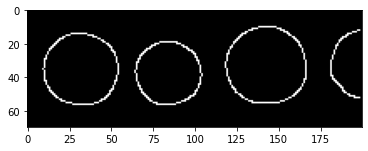

In [5]:
plt.imshow(edges,plt.cm.gray)
plt.show()

In [4]:
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

In [6]:
hough_radii

array([20, 22, 24, 26, 28, 30, 32, 34])

In [7]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,total_num_peaks=3)

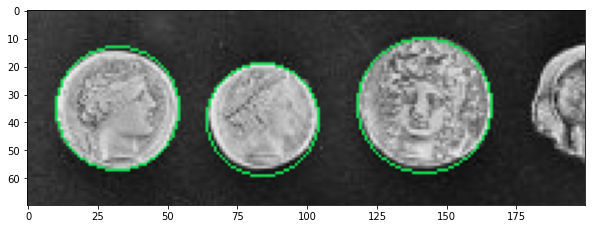

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
# Converting to grayscale
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    # Drawing greenish circles
    image[circy, circx] = (20, 220, 80)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

In [9]:
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

In [10]:
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=2.0,
              low_threshold=0.55, high_threshold=0.8)

In [11]:
result = hough_ellipse(edges, accuracy=20, threshold=250,min_size=100, max_size=120)
result.sort(order='accumulator')

In [12]:
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

In [13]:
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255) # Edge drawn in blue

In [14]:
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (0, 250, 50)

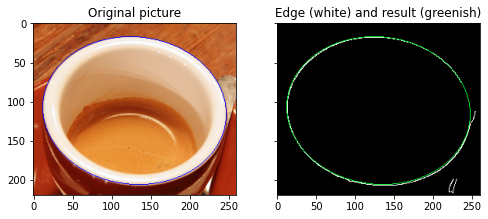

In [15]:
fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (greenish)')
ax2.imshow(edges)

plt.show()